# Project-1

*Author: Olzhas Shortanbaiuly.*

**Research question**: What is the relationship between GDP per capita and average life expectancy for the countries of Europe in 2019?

## Introduction

**Human Development Index** is an important statistic evaluating the quality of life for different countries. In calculation of Human Development Index, indicators as education level, life expectancy and gross national product per capita are used. I asked myself, in HDI, we use GNP, what if we changed it by GDP(gross domestic product)? How the GDP per capita affects the HDI or one of its components - life expectancy? <br>
Thereby, in this research project, *GDP per capita* and *life expectancy* were chosen as variables. <br>
It is known that <br>
**GDP per capita (in $)** - metric meaning the country's economic output per person.
For this project, I took GDP per capita values measured with *Purchasing Power Parity (PPP)*. The data were collected from World Bank Open Data (data.worldbank.org).  <br>
**Life expectancy (in years)** - measure of years expected for the citizens of the certain country to live. This metric is measured for two cases: at birth and at age 60. In this project, I used *life expectancy at birth*. The data source was Human Development Report 2020 by United Nations Development Programme. <br>
<br>
The data was collected for 38 European countries.

In [1]:
gdp_le <- read.csv("C:/Users/admin/Desktop/MATH 440 Regression Analysis/project/data.txt", sep='\t')
print(gdp_le)
my_model <-lm(LE~GDP, data = gdp_le)

       GDP   LE
1  13341.2 72.1
2  13627.0 71.9
3  14496.1 78.6
4  15883.3 77.4
5  17607.5 75.8
6  19013.4 76.0
7  19997.1 74.8
8  23189.2 76.9
9  24789.6 75.1
10 29181.4 72.9
11 30140.8 78.5
12 30722.2 82.2
13 32191.0 75.3
14 32297.3 76.1
15 34066.9 77.5
16 34431.2 78.7
17 34507.1 76.9
18 36639.3 82.1
19 38501.8 75.9
20 38915.2 78.8
21 40983.4 81.3
22 41254.4 81.0
23 42195.2 83.5
24 43299.6 79.4
25 44248.2 83.4
26 46279.1 82.5
27 48698.1 81.3
28 49435.2 82.7
29 51426.0 81.9
30 54904.7 81.6
31 55819.9 82.8
32 56278.2 81.3
33 58946.4 81.5
34 59554.2 82.3
35 60061.4 83.0
36 60178.5 80.9
37 66831.9 82.4
38 70989.3 83.8
39 88240.9 82.3


To perform any kind of analysis on our data, we should perform diagnostics on predictor variable and check whether it satisfies these 4 assumptions: <br>
1. *Normality* - checked by the QQ plot or by Shapiro-Wilk normality test; <br>
2. *Homogeneity of variance* - checked by the plot of residuals $e_i$ versus the fitted values $\hat{y_i}$;
3. *Linearity* - checked by the plot of residuals $e_i$ versus the fitted values $\hat{y}$;
4. *Independence* - checked by the plot of residuals $e_i$ versus $i$.

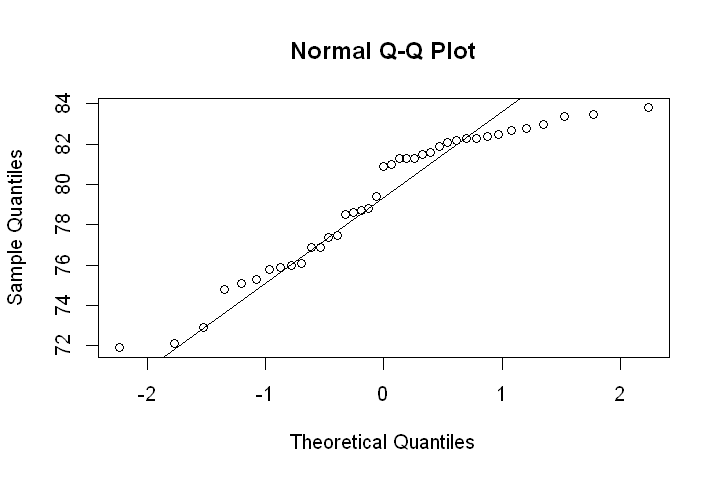

In [2]:
#Checking normality
options(repr.plot.width = 6,repr.plot.height = 4)
qqnorm(gdp_le$LE)
qqline(gdp_le$LE)

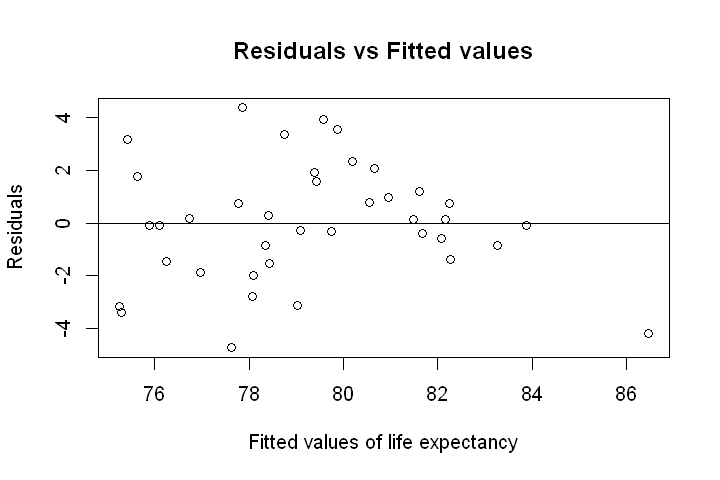

In [3]:
# Checking homogeneity of variance and linearity 
estimate = my_model$coefficients[1]+gdp_le[1]*my_model$coefficients[2]
df = data.frame(estimate, resid(my_model))
plot(df,xlab = 'Fitted values of life expectancy', ylab = 'Residuals', main = 'Residuals vs Fitted values')
abline(h = 0)

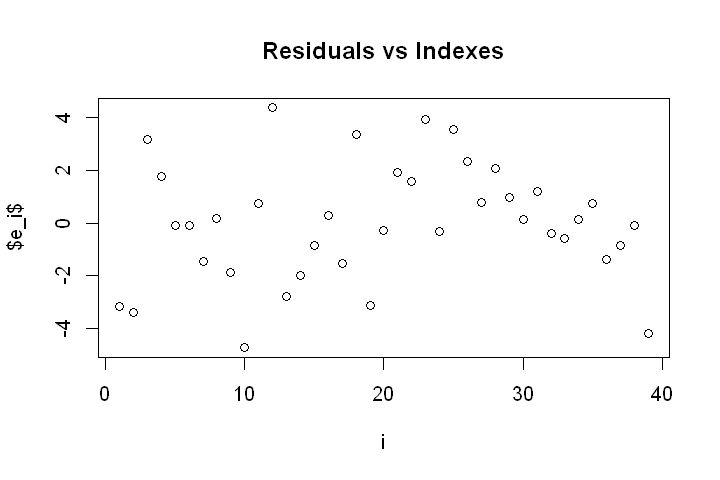

In [4]:
#Checking independence
ind = seq(1,length(resid(my_model)))
plot(ind,resid(my_model),xlab = 'i', ylab = '$e_i$', main = 'Residuals vs Indexes')

From the plots above, we come to the following conclusions:
1. *Normality* - QQ plot shows that values approximately lie along the line y=x, so **the normality is violated**; <br>
2. *Homogeneity of variance* - across the $\hat{y_i}$ values, a constant spread of the residuals $e_i$ is not observed, so **homogeneity of variance is violated**;
3. *Linearity* - the residuals $e_i$ are not evenly spread on both sides of 0, so **linearity is violated**;
4. *Independence* - in the plot of residuals $e_i$ versus $i$, any pattern can't be observed, so **independence is satisfied**.

From these assumptions, we may see that the relationship between GDP per capita and life expectancy at birth is not expected to be approximated well using the linear model.

## Analysis

Addressing our research question, the first question comes to find: <br>
**Is the relationship between GDP per capita and life expectancy at birth linear or not?** <br>
To check this, we can use T-test for the slope $\beta_1$ or make a linear regression plot to our data. <br>
Let's start off with the hypothesis test for slope $\beta_1$.

In [8]:
my_model <- lm(LE~GDP, data = gdp_le)
summary(my_model)


Call:
lm(formula = LE ~ GDP, data = gdp_le)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7229 -1.4049 -0.0791  1.3807  4.3465 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.326e+01  9.089e-01  80.598  < 2e-16 ***
GDP         1.496e-04  2.071e-05   7.227 1.42e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.239 on 37 degrees of freedom
Multiple R-squared:  0.5853,	Adjusted R-squared:  0.5741 
F-statistic: 52.23 on 1 and 37 DF,  p-value: 1.416e-08


We check the p-value for the t-statistic of GDP. Our hypothesis test for slope $\beta_1$ is the following:<br>
$H_{0}$: $\beta_1 = 0 $<br>
$H_{a}$: $\beta_1 \neq 0 $<br>
In the test for slope, as we obtained that $\beta_1$ = 0.0001496, the null hypothesis is rejected at any reasonable significance level, which means that the regression line has a non-zero slope and thereby *the relationship between GDP per capita and life expectancy is linear*. It can be shown using the following plot too.

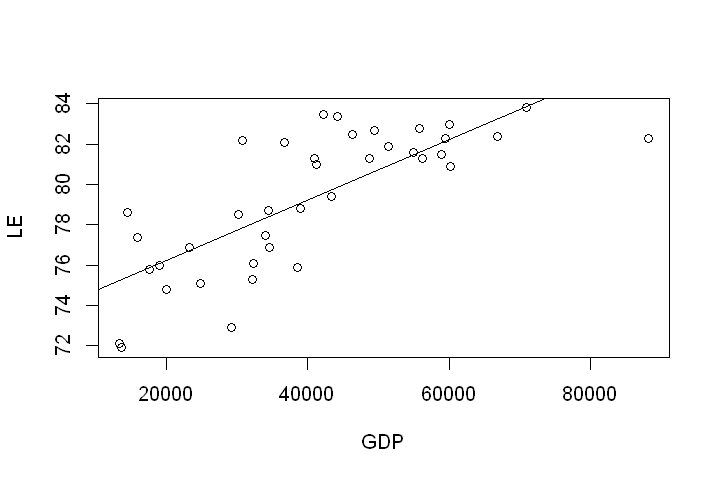

In [6]:
options(repr.plot.width = 6,repr.plot.height = 4)
df = data.frame(gdp_le[1], gdp_le[2])
plot(df)
abline(my_model)

As we can see from the plot and hypothesis test for the slope of the regression line, generally, linear regression can be used to approximate the relationship between GDP per capita and life expectancy.

Now, there rises a question regarding the linearity of relationship between GDP per capita and life expectancy at birth. The assumptions of linear regression were not satisfied, but the outcomes above show that this relationship can be fitted using a regression line. To further investigate it, we calculate *the coefficient of determination* and *sample correlation*.

In [12]:
a=summary(my_model)$adj.r.squared
a
sqrt(a)

[1] 0.5741226

[1] 0.7577088

$R^2$ = 0.574122626709282 -> the linear relationship between life expectancy at birth and GDP per capita is not strong. <br>
r = 0.757708800733687 -> approximately strong positive, linear association between life expectancy at birth and GDP per capita.

## Conclusion

To conclude, there is a linear relationship between life expectancy at birth and GDP per capita for countries of Europe in 2019, even though it is not strong, which was proved by hypothesis test on the slope of regression line and the coefficient of determination. Even though my analysis gave me certain conclusions on how the life expectancy changes in response to GDP per capita, as the regression assumptions were not satisfied, calculations obtained by the linear regression model may be inefficient. So we can't clearly state that life expectancy at birth directly depends from GDP per capita in countries of Europe in 2019.

## Discussion

There were certain weaknesses of the methods that I used in my analysis. First of all, I kept checking the summary statistic values despite the fact that the regression assumptions were not satisfied. To improve the results of the work, I recommend to investigate this analysis by taking GDP per capita as a predictor variable instead. GDP per capita values showed normality, which could be seen from QQ plot and Shapiro-Wilk test, as all the values lie along the QQ line and Shapiro-Wilk test gives a p-value of 0.8433 which is greater than 0.05, making us unable to reject the null hypothesis that the data are normally distributed. <br>
<br>
On top of that, life expectancy does not only depend from GDP per capita or income, so the quality of healthcare system should be considered too. This work can be improved by performing multivariable regression analysis taking into consideration the public health expenditures.

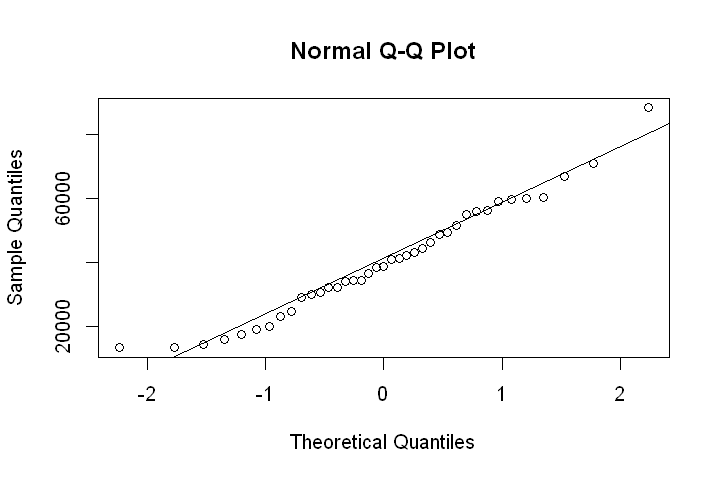

In [13]:
qqnorm(gdp_le$GDP)
qqline(gdp_le$GDP)

In [14]:
re=my_model$residuals
shapiro.test(re)


	Shapiro-Wilk normality test

data:  re
W = 0.98403, p-value = 0.8433
